# Wstępne przetwarzanie, imputacja

## Dostosowanie zbioru treningowego do testowego

In [1]:
#kolumny ze zbioru testowego
preds = strsplit(
  "calculation_id	calculation_token	etx_make_name	etx_model_name	etx_fuel_code	production_year	etx_model_code	vehicle_id	protection_scope	kind	usage_type	use_frequency	child_carriage_frequency	mileage	yearly_mileage	used_abroad	night_parking_place	night_parking_place_postal_code	day_parking_place	day_parking_place_postal_code	theft_protection_installation	theft_protection_device_1	theft_protection_device_2	origin	buy_year	registration_date	is_damaged	leasing	car_worth	main_driver_postal_code	main_driver_age	main_driver_gender	insurance_start_date	phone_exists	calc_complete	calc_incomplete	calc_finished	phone_yes	phone_no	calculation_type	terms_acceptance	phone_acceptance	phone_accepted	step	created_at	created_at_date	affiliation_id	user_id	salesforce_lead	sent_to_sf	sf_r_purchasing	calculation_state	oc_offers_qty	oc_offer_min_val	ac_offers_qty	ac_offer_min_val	b2c_leads_sent	form_finished_at	offer_first_at	offer_last_at	offer_first_after	offer_last_after	phone_lookup_status	utm_campaign	utm_content	utm_medium	utm_source	pkb_transform_ver	went_to_partners	contact_requests	Acc_Agreement_call__c	Acc_Agreement_marketing__c	Acc_Agreement_newsletter__c	Acc_Birthdate__c	Acc_PhoneHLRStatus__c	Account__r.AccountSource	Account__r.AgreementCall__pc	Account__r.AgreementMarketing__pc	Account__r.AgreementNewsletter__pc	Account__r.BillingCity	Account__r.BillingPostalCode	Account__r.CreatedById	Account__r.CreatedDate	Account__r.Gender__pc	Account__r.Id	Account__r.IsDeleted	Account__r.IsPersonAccount	Account__r.LegacyID__c	Account__r.OwnerId	Account__r.PersonBirthdate	Account__r.PersonContactId	Account__r.PhoneHLRStatus__pc	Account__r.PhoneNATStatus__pc	Account__r.RecordTypeId	Account__r.Salutation	Account__r.Type	CalculationToken__c	CarEngineCapacity__c	CarFuelType__c	CarMake__c	CarModel__c	CarYear__c	CpcPaid__c	CreatedBy.Alias	CreatedBy.CreatedDate	CreatedById	CreatedDate	Id	IsDeleted	Mpc__c	PolicyStartDate__c	ProductScope__c	Source__c	WentToPartner__c	dont_have_this_car__c	TelehubStatus__c",
         "\t")[[1]]

In [2]:
preds

[1] "calculation_id"                     "calculation_token"                 
  [3] "etx_make_name"                      "etx_model_name"                    
  [5] "etx_fuel_code"                      "production_year"                   
  [7] "etx_model_code"                     "vehicle_id"                        
  [9] "protection_scope"                   "kind"                              
 [11] "usage_type"                         "use_frequency"                     
 [13] "child_carriage_frequency"           "mileage"                           
 [15] "yearly_mileage"                     "used_abroad"                       
 [17] "night_parking_place"                "night_parking_place_postal_code"   
 [19] "day_parking_place"                  "day_parking_place_postal_code"     
 [21] "theft_protection_installation"      "theft_protection_device_1"         
 [23] "theft_protection_device_2"          "origin"                            
 [25] "buy_year"                           "registration_date"                 
 [27] "is_damaged"                         "leasing"                           
 [29] "car_worth"                          "main_driver_postal_code"           
 [31] "main_driver_age"                    "main_driver_gender"                
 [33] "insurance_start_date"               "phone_exists"                      
 [35] "calc_complete"                      "calc_incomplete"                   
 [37] "calc_finished"                      "phone_yes"                         
 [39] "phone_no"                           "calculation_type"                  
 [41] "terms_acceptance"                   "phone_acceptance"                  
 [43] "phone_accepted"                     "step"                              
 [45] "created_at"                         "created_at_date"                   
 [47] "affiliation_id"                     "user_id"                           
 [49] "salesforce_lead"                    "sent_to_sf"                        
 [51] "sf_r_purchasing"                    "calculation_state"                 
 [53] "oc_offers_qty"                      "oc_offer_min_val"                  
 [55] "ac_offers_qty"                      "ac_offer_min_val"                  
 [57] "b2c_leads_sent"                     "form_finished_at"                  
 [59] "offer_first_at"                     "offer_last_at"                     
 [61] "offer_first_after"                  "offer_last_after"                  
 [63] "phone_lookup_status"                "utm_campaign"                      
 [65] "utm_content"                        "utm_medium"                        
 [67] "utm_source"                         "pkb_transform_ver"                 
 [69] "went_to_partners"                   "contact_requests"                  
 [71] "Acc_Agreement_call__c"              "Acc_Agreement_marketing__c"        
 [73] "Acc_Agreement_newsletter__c"        "Acc_Birthdate__c"                  
 [75] "Acc_PhoneHLRStatus__c"              "Account__r.AccountSource"          
 [77] "Account__r.AgreementCall__pc"       "Account__r.AgreementMarketing__pc" 
 [79] "Account__r.AgreementNewsletter__pc" "Account__r.BillingCity"            
 [81] "Account__r.BillingPostalCode"       "Account__r.CreatedById"            
 [83] "Account__r.CreatedDate"             "Account__r.Gender__pc"             
 [85] "Account__r.Id"                      "Account__r.IsDeleted"              
 [87] "Account__r.IsPersonAccount"         "Account__r.LegacyID__c"            
 [89] "Account__r.OwnerId"                 "Account__r.PersonBirthdate"        
 [91] "Account__r.PersonContactId"         "Account__r.PhoneHLRStatus__pc"     
 [93] "Account__r.PhoneNATStatus__pc"      "Account__r.RecordTypeId"           
 [95] "Account__r.Salutation"              "Account__r.Type"                   
 [97] "CalculationToken__c"                "CarEngineCapacity__c"              
 [99] "CarFuelType__c"                     "CarMake__c"                        
[1

In [3]:
length(preds)

[1] 116

In [4]:
load('ABH.rda')
df = ABH

In [5]:
ncol(df)

[1] 152

In [7]:
#wybieram tylko kolumny, ktore sa w zbiorze testowym

In [6]:
indices = sapply(preds, function(pred){which(colnames(df)==pred)})

In [7]:
length(indices)

[1] 116

In [8]:
labelindex = which(colnames(df)=='Sale.success')

In [9]:
#to jest etykieta wlasciwa - czy sprzedaz sie udala?
labelindex

[1] 148

In [10]:
unlist(indices)

calculation_id                  calculation_token 
                                 1                                  2 
                     etx_make_name                     etx_model_name 
                                 3                                  4 
                     etx_fuel_code                    production_year 
                                 5                                  6 
                    etx_model_code                         vehicle_id 
                                 7                                  8 
                  protection_scope                               kind 
                                 9                                 10 
                        usage_type                      use_frequency 
                                11                                 12 
          child_carriage_frequency                            mileage 
                                13                                 14 
                    yearly_mileage                        used_abroad 
                                15                                 16 
               night_parking_place    night_parking_place_postal_code 
                                17                                 18 
                 day_parking_place      day_parking_place_postal_code 
                                19                                 20 
     theft_protection_installation          theft_protection_device_1 
                                21                                 22 
         theft_protection_device_2                             origin 
                                23                                 24 
                          buy_year                  registration_date 
                                25                                 26 
                        is_damaged                            leasing 
                                27                                 28 
                         car_worth            main_driver_postal_code 
                                29                                 30 
                   main_driver_age                 main_driver_gender 
                                31                                 32 
              insurance_start_date                       phone_exists 
                                33                                 34 
                     calc_complete                    calc_incomplete 
                                35                                 36 
                     calc_finished                          phone_yes 
                                37                                 38 
                          phone_no                   calculation_type 
                                39                                 40 
                  terms_acceptance                   phone_acceptance 
                                41                                 42 
                    phone_accepted                               step 
                                43                                 44 
                        created_at                    created_at_date 
                                45                                 46 
                    affiliation_id                            user_id 
                                47                                 48 
                        sent_to_sf                    sf_r_purchasing 
                                49                                 50 
                 calculation_state                      oc_offers_qty 
                                51                                 52 
                  oc_offer_min_val                      ac_offers_qty 
                                53                                 54 
                  ac_offer_min_val                     b2c_leads_sent 
                                55                                 56 
                  form_finished_at          

In [11]:
#wlasciwa ramka danych - to co w testowym + etykieta
train = df[,c(unlist(indices),labelindex)]

In [12]:
ncol(train)

[1] 116

In [13]:
head(train)

,calculation_id,calculation_token,etx_make_name,etx_model_name,etx_fuel_code,production_year,etx_model_code,vehicle_id,protection_scope,kind,⋯,Id,IsDeleted,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c,Sale.success
1,1847410,Fc5o2b,RENAULT,Megane,100001,1997,8191,7045,1,car,⋯,a00410000086mtqAAA,FALSE,NA,42811,OC,full_calc,FALSE,FALSE,NA,0
3,1847453,dRXV5F,MAZDA,323,100001,1996,7884,34707,1,car,⋯,a00410000086mniAAA,FALSE,NA,42794,OC,full_calc,FALSE,FALSE,NA,0
4,1847456,eRdBt1,AUDI,Q7,100003,2007,12113,60275,2,car,⋯,a00410000086lSqAAI,FALSE,NA,42795,OC+AC,full_calc,FALSE,FALSE,NA,0
5,1847478,ZWLyxM,VOLKSWAGEN,Passat,100003,2001,10533,41583,1,car,⋯,a00410000086mwuAAA,FALSE,NA,42807,OC,full_calc,TRUE,FALSE,NA,0
6,1847487,rCzLgy,PEUGEOT,406,100003,2000,9674,36042,1,car,⋯,a00410000086mzKAAQ,FALSE,NA,42803,OC,full_calc,FALSE,FALSE,NA,0
7,1847494,A1_zH9,SKODA,Fabia,100001,2001,10269,44128,1,car,⋯,a00410000086mvDAAQ,FALSE,NA,42822,OC,full_calc,FALSE,FALSE,NA,1


## usuwanie identyfikatorów

In [14]:
colnames(train)[grepl(".*id.*", colnames(train), ignore.case = T)]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [15]:
ids = which(grepl(".*id.*",colnames(train),ignore.case=T))

In [16]:
#identyfikatory, do usuniecia
ids

[1]   1   8  47  48  81  84  87  88  90  93 102 105 107

In [17]:
colnames(train)[ids]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [18]:
#ta kolumna moze sie przydac
cpcpaid = which(colnames(train)=='CpcPaid__c')

In [19]:
cpcpaid

[1] 102

In [20]:
#token kalkulacji nie jest potrzebny
calctokenid = which(colnames(train)=='calculation_token')

In [21]:
ids = c(ids[ids!=cpcpaid],calctokenid)

In [22]:
ids

[1]   1   8  47  48  81  84  87  88  90  93 105 107   2

In [23]:
#te predyktory powyzej do usuniecia, zatem usuwam
train2 = train[,-ids]

In [24]:
ncol(train2)

[1] 103

## Zamiana character -> numeric

In [25]:
sapply(train2,class)

etx_make_name                     etx_model_name 
                       "character"                        "character" 
                     etx_fuel_code                    production_year 
                       "character"                        "character" 
                    etx_model_code                   protection_scope 
                       "character"                        "character" 
                              kind                         usage_type 
                       "character"                        "character" 
                     use_frequency           child_carriage_frequency 
                       "character"                        "character" 
                           mileage                     yearly_mileage 
                       "character"                        "character" 
                       used_abroad                night_parking_place 
                         "numeric"                        "character" 
   night_parking_place_postal_code                  day_parking_place 
                       "character"                        "character" 
     day_parking_place_postal_code      theft_protection_installation 
                       "character"                        "character" 
         theft_protection_device_1          theft_protection_device_2 
                       "character"                        "character" 
                            origin                           buy_year 
                       "character"                        "character" 
                 registration_date                         is_damaged 
                         "numeric"                        "character" 
                           leasing                          car_worth 
                       "character"                        "character" 
           main_driver_postal_code                    main_driver_age 
                       "character"                          "numeric" 
                main_driver_gender               insurance_start_date 
                       "character"                          "numeric" 
                      phone_exists                      calc_complete 
                       "character"                          "numeric" 
                   calc_incomplete                      calc_finished 
                         "numeric"                          "numeric" 
                         phone_yes                           phone_no 
                         "numeric"                          "numeric" 
                  calculation_type                   terms_acceptance 
                       "character"                          "numeric" 
                  phone_acceptance                     phone_accepted 
                         "numeric"                          "numeric" 
                              step                         created_at 
                         "numeric"                          "numeric" 
                   created_at_date                         sent_to_sf 
                         "numeric"                          "numeric" 
                   sf_r_purchasing                  calculation_state 
                         "numeric"                        "character" 
                     oc_offers_qty                   oc_offer_min_val 
                         "numeric"                          "numeric" 
                     ac_offers_qty                   ac_offer_min_val 
                         "numeric"                          "numeric" 
                    b2c_leads_sent                   form_finished_at 
                         "numeric"                          "numeric" 
                    offer_first_at                      offer_last_at 
                         "numeric"                          "numeric" 
                 offer_first_after                   offer_last_after 
                         "numeric"                          "numeric" 
               phone_lookup_status           

In [26]:
#te kolumny są numeryczne, a wczytane zostały jako character, zatem zamiana

In [27]:
train2$production_year = as.numeric(train2$production_year)
train2$mileage = as.numeric(train2$mileage)
train2$yearly_mileage = as.numeric(train2$yearly_mileage)
train2$buy_year = as.numeric(train2$buy_year)
train2$car_worth = as.numeric(train2$car_worth)


In [28]:
sapply(train2,class)

etx_make_name                     etx_model_name 
                       "character"                        "character" 
                     etx_fuel_code                    production_year 
                       "character"                          "numeric" 
                    etx_model_code                   protection_scope 
                       "character"                        "character" 
                              kind                         usage_type 
                       "character"                        "character" 
                     use_frequency           child_carriage_frequency 
                       "character"                        "character" 
                           mileage                     yearly_mileage 
                         "numeric"                          "numeric" 
                       used_abroad                night_parking_place 
                         "numeric"                        "character" 
   night_parking_place_postal_code                  day_parking_place 
                       "character"                        "character" 
     day_parking_place_postal_code      theft_protection_installation 
                       "character"                        "character" 
         theft_protection_device_1          theft_protection_device_2 
                       "character"                        "character" 
                            origin                           buy_year 
                       "character"                          "numeric" 
                 registration_date                         is_damaged 
                         "numeric"                        "character" 
                           leasing                          car_worth 
                       "character"                          "numeric" 
           main_driver_postal_code                    main_driver_age 
                       "character"                          "numeric" 
                main_driver_gender               insurance_start_date 
                       "character"                          "numeric" 
                      phone_exists                      calc_complete 
                       "character"                          "numeric" 
                   calc_incomplete                      calc_finished 
                         "numeric"                          "numeric" 
                         phone_yes                           phone_no 
                         "numeric"                          "numeric" 
                  calculation_type                   terms_acceptance 
                       "character"                          "numeric" 
                  phone_acceptance                     phone_accepted 
                         "numeric"                          "numeric" 
                              step                         created_at 
                         "numeric"                          "numeric" 
                   created_at_date                         sent_to_sf 
                         "numeric"                          "numeric" 
                   sf_r_purchasing                  calculation_state 
                         "numeric"                        "character" 
                     oc_offers_qty                   oc_offer_min_val 
                         "numeric"                          "numeric" 
                     ac_offers_qty                   ac_offer_min_val 
                         "numeric"                          "numeric" 
                    b2c_leads_sent                   form_finished_at 
                         "numeric"                          "numeric" 
                    offer_first_at                      offer_last_at 
                         "numeric"                          "numeric" 
                 offer_first_after                   offer_last_after 
                         "numeric"                          "numeric" 
               phone_lookup_status           

## Zamiana character -> factor, dodawanie poziomu NA

In [29]:
for (i in 1:length(train2)) {
  if (is.character(train2[,i])){
    train2[,i] = as.factor(train2[,i])
  }
  if (is.factor(train2[,i])){
      train2[,i] = addNA(train2[,i])
  }
}

## Usuwanie predyktorów z wariancją bliską zero (czyli takich co mają przeważnie jedną wartość lub jedna wartość jest drastycznie częsta)

In [31]:
if (!require("caret")){
    install.packages("caret")
}
library("caret")

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


In [32]:
nzv = nearZeroVar(train2,freqCut=99) #bardzo duży cutoff - 99/1 (by nie obcinać zbyt dużo)

In [33]:
colnames(train2)[nzv]

[1] "usage_type"                         "is_damaged"                        
 [3] "leasing"                            "calc_complete"                     
 [5] "calc_incomplete"                    "calc_finished"                     
 [7] "calculation_type"                   "terms_acceptance"                  
 [9] "sent_to_sf"                         "sf_r_purchasing"                   
[11] "calculation_state"                  "ac_offer_min_val"                  
[13] "pkb_transform_ver"                  "contact_requests"                  
[15] "Acc_Agreement_newsletter__c"        "Account__r.AgreementNewsletter__pc"
[17] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
[19] "Account__r.Type"                    "CpcPaid__c"                        
[21] "CreatedBy.Alias"                    "CreatedBy.CreatedDate"             
[23] "IsDeleted"

In [52]:
train3 = train2[,-nzv]
#od razu mniej predyktorów:
ncol(train3)

[1] 80

## Imputacja numerycznych faktorów

In [53]:
numericpreds = which(sapply(train3,class)=='numeric')
yind = which(names(numericpreds)=='Sale.success')
numericpreds = numericpreds[-yind]
numericpreds

production_year                    mileage 
                         4                         10 
            yearly_mileage                used_abroad 
                        11                         12 
                  buy_year          registration_date 
                        21                         22 
                 car_worth            main_driver_age 
                        23                         25 
      insurance_start_date                  phone_yes 
                        27                         29 
                  phone_no           phone_acceptance 
                        30                         31 
            phone_accepted                       step 
                        32                         33 
                created_at            created_at_date 
                        34                         35 
             oc_offers_qty           oc_offer_min_val 
                        36                         37 
             ac_offers_qty             b2c_leads_sent 
                        38                         39 
          form_finished_at             offer_first_at 
                        40                         41 
             offer_last_at          offer_first_after 
                        42                         43 
          offer_last_after        phone_lookup_status 
                        44                         45 
          went_to_partners           Acc_Birthdate__c 
                        50                         53 
    Account__r.CreatedDate Account__r.PersonBirthdate 
                        60                         62 
      CarEngineCapacity__c                 CarYear__c 
                        67                         71 
               CreatedDate         PolicyStartDate__c 
                        72                         74

### Numeryczne atrybuty bez NA, poszukam takich:

In [54]:
has_NA = sapply(numericpreds,function(npred)any(is.na(train3[,npred])))

In [55]:
numericpreds = numericpreds[has_NA]
numericpreds

mileage             yearly_mileage 
                        10                         11 
                  buy_year                  car_worth 
                        21                         23 
             oc_offers_qty              ac_offers_qty 
                        36                         38 
            b2c_leads_sent           form_finished_at 
                        39                         40 
            offer_first_at              offer_last_at 
                        41                         42 
          Acc_Birthdate__c Account__r.PersonBirthdate 
                        53                         62 
      CarEngineCapacity__c                 CarYear__c 
                        67                         71 
        PolicyStartDate__c 
                        74

Jest ich na tyle mało, że imputacja może być ręczna

In [56]:
#sprawdzam frakcję brakujących danych
sapply(train3[,numericpreds],function(x){mean(is.na(x))})

mileage             yearly_mileage 
              5.339256e-05               4.271405e-05 
                  buy_year                  car_worth 
              5.339256e-05               3.583709e-02 
             oc_offers_qty              ac_offers_qty 
              1.847383e-03               1.428571e-01 
            b2c_leads_sent           form_finished_at 
              7.032868e-02               2.028917e-04 
            offer_first_at              offer_last_at 
              2.843368e-01               2.843368e-01 
          Acc_Birthdate__c Account__r.PersonBirthdate 
              4.922794e-01               4.922794e-01 
      CarEngineCapacity__c                 CarYear__c 
              3.162975e-02               3.151229e-02 
        PolicyStartDate__c 
              7.047818e-03

In [237]:
#kilka predyktorów ma dużo brakujących danych - trzeba będzie potem pomyśleć co z tym można zrobić

In [57]:
length(numericpreds)

[1] 15

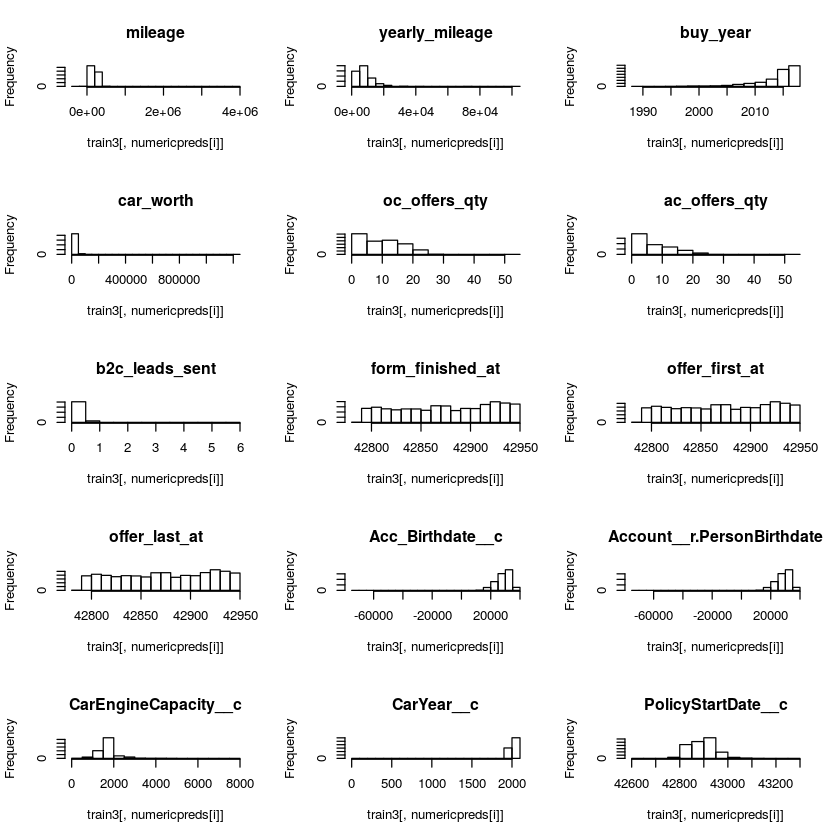

In [58]:
#rozkład wartości w predyktorach
par(mfrow=c(5,3))
for (i in 1:length(numericpreds)){
    hist(train3[,numericpreds[i]],main=colnames(train3)[numericpreds[i]])
}

Imputacja brakujących danych przez średnie (inne metody są niewykonalne w skończonym czasie)

In [59]:
for (numericpred in numericpreds){
    train3[which(is.na(train3[,numericpred])),numericpred] = as.integer(mean(na.omit(train3[,numericpred])))
}

In [60]:
#nie ma już żadnych brakujących wartości
any(sapply(train3,function(x)any(is.na(x))))

[1] FALSE

## Zamiana logical na numeric

In [61]:
(linds = which(sapply(train3,class)%in%c('logical')))

[1] 51 52 56 57 77 78

In [62]:
for (l in linds){
    train3[,l] = as.integer(train3[,l])
}

## Korelacje

In [63]:
#korelacja nie dziala dla factorow - sprawdzam zatem tylko dla ilosciowych
numerics = which(sapply(train3,class)%in%c('numeric','integer'))
cr = cor(train3[,numerics])

In [79]:
correlated = findCorrelation(cr,cutoff= 0.8,names=TRUE)

In [80]:
correlated

[1] "Account__r.CreatedDate"       "CreatedDate"                 
 [3] "created_at"                   "form_finished_at"            
 [5] "created_at_date"              "insurance_start_date"        
 [7] "offer_first_at"               "phone_yes"                   
 [9] "phone_no"                     "phone_acceptance"            
[11] "phone_accepted"               "Acc_Agreement_call__c"       
[13] "Acc_Agreement_marketing__c"   "Account__r.AgreementCall__pc"
[15] "oc_offers_qty"                "Acc_Birthdate__c"

In [81]:
traininds = sapply(correlated,function(cc)which(colnames(train3)==cc))

In [125]:
train4 = train3[,-traininds]

In [126]:
ncol(train4)

[1] 64

## Współliniowość

In [85]:
#podobnie jak wczesniej, znowu dla ilosciowych tylko
numerics = which(sapply(train4,class)%in%c('numeric','integer'))

In [86]:
numerics

[1]  4 10 11 12 21 22 23 25 28 29 30 31 32 33 34 35 40 43 47 52 56 58 61 62 64

In [87]:
combos = findLinearCombos(train4[,numerics])

In [88]:
combos

$linearCombos
list()

$remove
NULL


Korelacja usunęła współliniowości.

## Zamiana kodów pocztowych na rejon

### Funkcja

In [153]:
postalCodeToRegion = function (vector){
    vector = as.character(vector)
    codes = sapply(vector,function(v){
        if (is.na(v) | (substr(v,3,3) != '-') | (nchar(v) != 6)){
            NA
        } else {
            aa = substr(v,1,2)
            a = substr(aa,1,1)
            if (a == '0'){
                if (aa %in% c('00','01','02','03','04','05')){
                    'Warsaw'
                } else {
                    'Warsaw Region'
                }
            }else if (a == '1'){
                if (aa == '10'){
                    'Olsztyn'
                } else if (aa=='15'){
                    'Bialystok'
                } else {
                    'Olsztyn Region'
                }
            }else if (a == '2'){
                if (aa == '20'){
                    'Lublin'
                } else if (aa=='25'){
                    'Kielce'
                } else if (aa=='26'){
                    'Radom'
                } else {
                    'Lublin Region'
                }
            }else if (a == '3'){
                if (aa %in% c('30','31')){
                    'Krakow'
                } else if (aa=='35'){
                    'Rzeszow'
                } else {
                    'Krakow Region'
                }
            }else if (a == '4'){
                if (aa =='40'){
                    'Katowice'
                } else if (aa=='45'){
                    'Opole'
                } else {
                    'Katowice Region'
                }
            }else if (a == '5'){
                if (aa %in% c('50','51','52','53','54')){
                    'Wroclaw'
                } else {
                    'Wroclaw Region'
                }
            }else if (a == '6'){
                if (aa %in% c('60','61')){
                    'Poznan'
                } else if (aa=='65'){
                    'Zielona Gora'
                } else {
                    'Poznan Region'
                }
            }else if (a == '7'){
                if (aa %in% c('70','71')){
                    'Szczecin'
                } else if (aa=='75'){
                    'Koszalin'
                } else {
                    'Szczecin Region'
                }
            }else if (a == '8'){
                if (aa=='80'){
                    'Gdansk'
                } else if (aa=='81'){
                    'Gdynia'
                } else if (aa=='87'){
                    'Torun'
                }  else if (aa=='85'){
                    'Bydgoszcz'
                } else {
                    'Gdansk Region'
                }
            }else if (a == '9'){
                if (aa %in% c('90','91','92','93','94')){
                    'Lodz'
                } else {
                    'Lodz Region'
                }
            }else {NA}
        }
    })
    fcodes = as.factor(codes)
    fcodes = addNA(fcodes)
    fcodes
}

In [154]:
#unit test
(fac = postalCodeToRegion(c('87-165','00-849','44-123',NA)))
class(fac)
levels(fac)

87-165          00-849          44-123            <NA> 
          Torun          Warsaw Katowice Region            <NA> 
Levels: Katowice Region Torun Warsaw <NA>

[1] "factor"

[1] "Katowice Region" "Torun"           "Warsaw"          NA

In [156]:
#kodami pocztowymi są:
#night_parking_place_postal_code
#day_parking_place_postal_code
#main_driver_postal_code
#Account__r.BillingPostalCode

train4$night_parking_place_postal_code = postalCodeToRegion (train4$night_parking_place_postal_code)
train4$day_parking_place_postal_code = postalCodeToRegion (train4$day_parking_place_postal_code)
train4$main_driver_postal_code = postalCodeToRegion (train4$main_driver_postal_code)
train4$Account__r.BillingPostalCode = postalCodeToRegion (train4$Account__r.BillingPostalCode)

In [158]:
class(train4$night_parking_place_postal_code)
class(train4$day_parking_place_postal_code)
class(train4$main_driver_postal_code)
class(train4$Account__r.BillingPostalCode)

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

In [159]:
head(train4$night_parking_place_postal_code)
head(train4$day_parking_place_postal_code)
head(train4$main_driver_postal_code)
head(train4$Account__r.BillingPostalCode)

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] <NA>            <NA>            <NA>            Katowice Region
[5] <NA>            <NA>           
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

## Daty na year,month,day

Nie trzeba zamieniać dat na year, month, day. Daty albo zostały usunięte wcześniej, albo zamienione na numeric (domyślnie najwidoczniej przez read.table)

## Propozycja radzenia sobie z markami pojazdów

In [209]:
#wybieranie pierwszej części stringa określającego markę, zbije trochę liczbę poziomów

length(unique(sapply(as.character(levels(train4$etx_model_name)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$etx_model_name))

length(unique(sapply(as.character(levels(train4$CarModel__c)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$CarModel__c))

[1] 666

[1] 729

[1] 766

[1] 1526

## W tym momencie - przerobione dane treningowe są w zmiennej train4, etykieta to Sale.success

# Funkcje do oceny modeli (ROC, AUC)

In [168]:
#funkcje do rysowania ROC

tpr = function(t=0.5,pred,ty){
  predh = as.integer(pred>t)
  sum(predh[which(ty==1)])/sum(ty)
}

fpr = function(t=0.5,pred,ty){
  predh = as.integer(pred>t)
  sum(predh[-which(ty==1)])/(length(ty)-sum(ty))
}

#funkcja
drawROC = function(pred,ty,title="ROC"){
  t = c((0:99)/100,seq(0.991,0.999,0.001))
  
  dx = sapply(t, function(tt){
    fpr(t=tt,pred,ty)
  })
  dy = sapply(t, function(tt){
    tpr(t=tt,pred,ty)
  })
  plot(dx,dy,xlim=c(0,1),ylim=c(0,1),type="l",col=1)
  title(main=title)
  abline(0,1,col=2)
}


# Poniżej modele predykcyjne

## Regresja logistyczna na zmiennych numerycznych

In [169]:
numerics = which(sapply(train4,class)%in%c('numeric','integer'))

In [418]:
train_g = train4[1:(nrow(train4)/2),numerics]
test_g = train4[((nrow(train3)/2)+1):(nrow(train4)),numerics]

testy_g = train4$Sale.success[((nrow(train4)/2)+1):(nrow(train4))]

test_g = test_g[,-which(colnames(test_g)=='Sale.success')]

In [419]:
library(glmnet)
#glm próbuje zrobić one-hot-encoding, a to jest niemożliwe na zbiorze (jest za duży)
#biorę zatem próbkę
g=  glm(Sale.success~.,data=train_g,family="binomial")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

A propo tego wyżej, nie wiem o co mu chodzi, model tak czy siak jest kiepski

In [420]:
pred = predict(g,test_g,type="response")

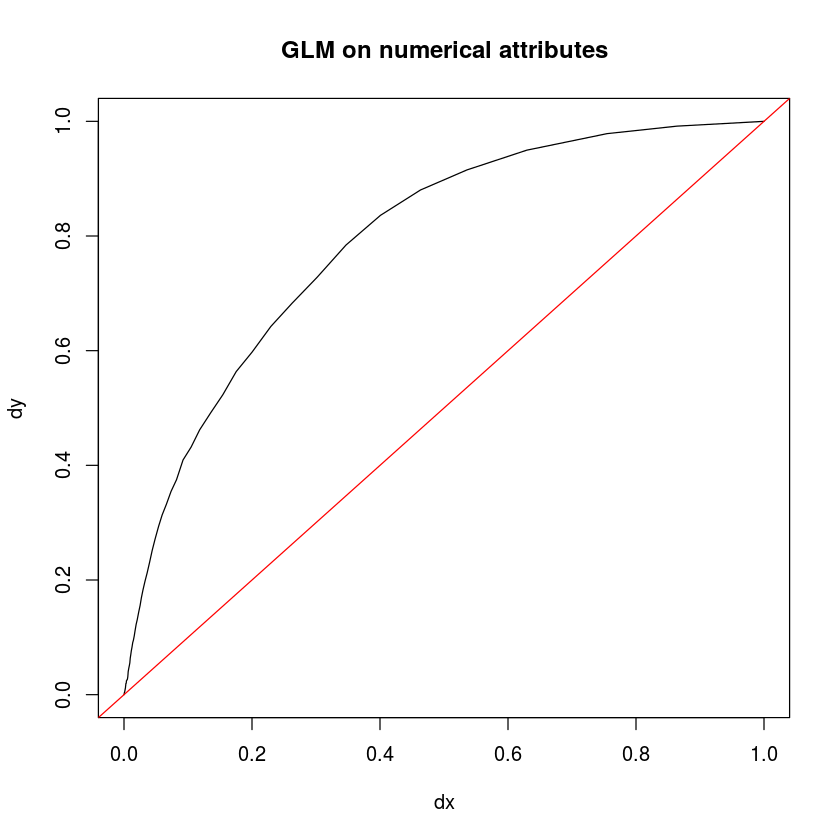

In [422]:
drawROC(pred,testy_g,"GLM on numerical attributes")